In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import os
import tensorflow as tf  
from sklearn import metrics
from scipy.signal import lfilter
%matplotlib inline

In [2]:
#required column labels 

COLUMNS = ['ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)', 'ACCELEROMETER Z (m/s²)', 'GRAVITY X (m/s²)', 'GRAVITY Y (m/s²)', 'GRAVITY Z (m/s²)', 'LINEAR ACCELERATION X (m/s²)', 'LINEAR ACCELERATION Y (m/s²)', 'LINEAR ACCELERATION Z (m/s²)', 'GYROSCOPE X (rad/s)', 'GYROSCOPE Y (rad/s)', 'GYROSCOPE Z (rad/s)', 'YYYY-MO-DD HH-MI-SS_SSS']
COLUMNS2 = ['ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)', 'ACCELEROMETER Z (m/s²)', 'GRAVITY X (m/s²)', 'GRAVITY Y (m/s²)', 'GRAVITY Z (m/s²)', 'LINEAR ACCELERATION X (m/s²)', 'LINEAR ACCELERATION Y (m/s²)', 'LINEAR ACCELERATION Z (m/s²)', 'GYROSCOPE X (rad/s)', 'GYROSCOPE Y (rad/s)', 'GYROSCOPE Z (rad/s)', 'YYYY-MO-DD HH-MI-SS_SSS', 'LABEL_DATA']


In [3]:
#Data from the Walking Folder
walking_directory = glob.glob(os.path.join(r'6m_data\Walking',"*.csv"))
df_from_file_train = []
df_from_file_test = []
for f in  walking_directory:
    temp_frame = pd.read_csv(f, skipinitialspace=True, usecols = COLUMNS)
    df_from_file_train.append(temp_frame[100:-600])
    df_from_file_test.append(temp_frame[-600:-100])
    df_from_file_train.append(temp_frame[100:-600])
    df_from_file_test.append(temp_frame[-600:-100])
    
WALKING_training = pd.concat(df_from_file_train, ignore_index=True)
WALKING_testing = pd.concat(df_from_file_test, ignore_index=True)


In [4]:
#Data from the standing Folder
standing_directory = glob.glob(os.path.join(r'6m_data\Standing',"*.csv"))

# df_from_STfile = (pd.read_csv(f, skipinitialspace=True, usecols = COLUMNS) for f in standing_directory)
# STANDING = pd.concat(df_from_STfile, ignore_index=True)
df_from_file_train[:] = []
df_from_file_test[:] = []
for f in  standing_directory:
    temp_frame = pd.read_csv(f, skipinitialspace=True, usecols = COLUMNS)
    df_from_file_train.append(temp_frame[100:-600])
    df_from_file_test.append(temp_frame[-600:-100])
    df_from_file_train.append(temp_frame[100:-600])
    df_from_file_test.append(temp_frame[-600:-100])
    
    
STANDING_training = pd.concat(df_from_file_train, ignore_index=True)
STANDING_testing = pd.concat(df_from_file_test, ignore_index=True)

In [5]:
#Data from the sitting Folder
sitting_directory = glob.glob(os.path.join(r'6m_data\Sitting',"*.csv"))
# df_from_SIfile = (pd.read_csv(f, skipinitialspace=True, usecols = COLUMNS) for f in sitting_directory)
# SITTING = pd.concat(df_from_SIfile, ignore_index=True)
df_from_file_train[:] = []
df_from_file_test[:] = []
for f in  sitting_directory:
    temp_frame = pd.read_csv(f, skipinitialspace=True, usecols = COLUMNS)
    df_from_file_train.append(temp_frame[100:-600])
    df_from_file_test.append(temp_frame[-600:-100])
    df_from_file_train.append(temp_frame[100:-600])
    df_from_file_test.append(temp_frame[-600:-100])
    
SITTING_training = pd.concat(df_from_file_train, ignore_index=True)
SITTING_testing = pd.concat(df_from_file_test, ignore_index=True)

In [6]:
#Data from placing the phone on the table
placing_directory = glob.glob(os.path.join(r'6m_data\Placing',"*.csv"))
# df_from_Pfile = (pd.read_csv(f, skipinitialspace=True, usecols = COLUMNS) for f in placing_directory)
# PLACING = pd.concat(df_from_Pfile, ignore_index=True)
df_from_file_train[:] = []
df_from_file_test[:] = []
for f in  placing_directory:
    temp_frame = pd.read_csv(f, skipinitialspace=True, usecols = COLUMNS)
    df_from_file_train.append(temp_frame[100:-600])
    df_from_file_test.append(temp_frame[-600:-100])
    df_from_file_train.append(temp_frame[100:-600])
    df_from_file_test.append(temp_frame[-600:-100])
    
PLACING_training = pd.concat(df_from_file_train, ignore_index=True)
PLACING_testing = pd.concat(df_from_file_test, ignore_index=True)

In [7]:
#Data from dropping the phone while standing

dropping_directory = glob.glob(os.path.join(r'6m_data\Dropping',"*.csv"))
df_from_file_train[:] = []
df_from_file_test[:] = []

for f in  dropping_directory:
    t_frame = pd.read_csv(f, skipinitialspace=True, usecols = COLUMNS2)
    temp_frame = t_frame.loc[t_frame['LABEL_DATA'] == "Drop"]
    for i in range(10):
        df_from_file_train.append(temp_frame[0:-270])
        df_from_file_test.append(temp_frame[-270:])
    
    
DROPPING_training = pd.concat(df_from_file_train, ignore_index=True)
DROPPING_testing = pd.concat(df_from_file_test, ignore_index=True)


In [8]:
# Data from taking out the phone while walking

takingout_directory = glob.glob(os.path.join(r'6m_data\TakingPhoneOut',"*.csv"))

df_from_file_train[:] = []
df_from_file_test[:] = []
for f in  takingout_directory:
    t_frame = pd.read_csv(f, skipinitialspace=True, usecols = COLUMNS2)
    temp_frame = t_frame.loc[t_frame['LABEL_DATA'] == "Out"] 
    for i in range(4):
        df_from_file_train.append(temp_frame[:-270])
        df_from_file_test.append(temp_frame[-270:])
    
    
TAKINGOUT_training = pd.concat(df_from_file_train, ignore_index=True)
TAKINGOUT_testing = pd.concat(df_from_file_test, ignore_index=True)


In [9]:
#Data from thief taking out the phone while walking

thief_directory = glob.glob(os.path.join(r'6m_data\Thief',"*.csv"))
# df_from_Pfile = (pd.read_csv(f, skipinitialspace=True, usecols = COLUMNS) for f in placing_directory)
# PLACING = pd.concat(df_from_Pfile, ignore_index=True)
df_from_file_train[:] = []
df_from_file_test[:] = []
for f in  thief_directory:
    t_frame = pd.read_csv(f, skipinitialspace=True, usecols = COLUMNS2)
    temp_frame = t_frame.loc[t_frame['LABEL_DATA'] == "Out"]
    for i in range(4):
        df_from_file_train.append(temp_frame[0:-270])
        df_from_file_test.append(temp_frame[-270:])
    

THIEF_training = pd.concat(df_from_file_train, ignore_index=True)
THIEF_testing = pd.concat(df_from_file_test, ignore_index=True)

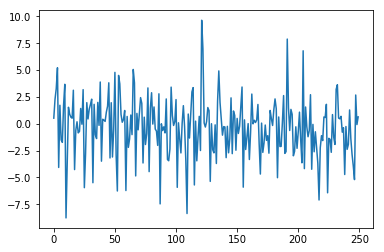

In [10]:
plt.plot(WALKING_training['ACCELEROMETER X (m/s²)'][0:250])
plt.show()

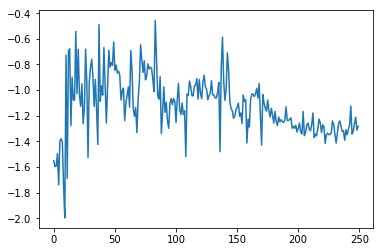

In [11]:
plt.plot(STANDING_training['ACCELEROMETER X (m/s²)'][0:250])
plt.show()

In [12]:
date_col = 'YYYY-MO-DD HH-MI-SS_SSS'
WALKING_training[date_col] = pd.to_datetime(WALKING_training[date_col], format='%Y-%m-%d %H:%M:%S:%f')
STANDING_training[date_col] = pd.to_datetime(STANDING_training[date_col], format='%Y-%m-%d %H:%M:%S:%f')
SITTING_training[date_col] = pd.to_datetime(SITTING_training[date_col], format='%Y-%m-%d %H:%M:%S:%f')
PLACING_training[date_col] = pd.to_datetime(PLACING_training[date_col], format='%Y-%m-%d %H:%M:%S:%f')
WALKING_testing[date_col] = pd.to_datetime(WALKING_testing[date_col], format='%Y-%m-%d %H:%M:%S:%f')
STANDING_testing[date_col] = pd.to_datetime(STANDING_testing[date_col], format='%Y-%m-%d %H:%M:%S:%f')
SITTING_testing[date_col] = pd.to_datetime(SITTING_testing[date_col], format='%Y-%m-%d %H:%M:%S:%f')
PLACING_testing[date_col] = pd.to_datetime(PLACING_testing[date_col], format='%Y-%m-%d %H:%M:%S:%f')
DROPPING_training[date_col] = pd.to_datetime(DROPPING_training[date_col], format='%Y-%m-%d %H:%M:%S:%f')
DROPPING_testing[date_col] = pd.to_datetime(DROPPING_testing[date_col], format='%Y-%m-%d %H:%M:%S:%f')
TAKINGOUT_training[date_col] = pd.to_datetime(TAKINGOUT_training[date_col], format='%Y-%m-%d %H:%M:%S:%f')
TAKINGOUT_testing[date_col] = pd.to_datetime(TAKINGOUT_testing[date_col], format='%Y-%m-%d %H:%M:%S:%f')
THIEF_training[date_col] = pd.to_datetime(THIEF_training[date_col], format='%Y-%m-%d %H:%M:%S:%f')
THIEF_testing[date_col] = pd.to_datetime(THIEF_testing[date_col], format='%Y-%m-%d %H:%M:%S:%f')



In [13]:
#functions to plot various activities

def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
def plot_activity(activity):
    n = 15  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
    
    plot_axis(ax0, activity[date_col], lfilter(b,a,activity['ACCELEROMETER X (m/s²)']), 'Accelerometer x Axis')
    plot_axis(ax1, activity[date_col], lfilter(b,a,activity['ACCELEROMETER Y (m/s²)']), 'Accelerometer y Axis')
    plot_axis(ax2, activity[date_col], lfilter(b,a,activity['ACCELEROMETER Z (m/s²)']), 'Accelerometer z Axis')

    plt.subplots_adjust(hspace=0.2)
    plt.show()
    

In [14]:
#prepare trainig dataset

from itertools import islice

TRAIN = 'train/'
TEST = 'test/'

X_signals = []

for colname, colvalues in islice(WALKING_training.iteritems(), 12):    
    X_signals.append([np.array(serie, dtype=np.float32) for serie in [colvalues[i:i+30] for i in range(0, len(colvalues), 15) if i <= len(colvalues)-30]])
X_train = np.array(X_signals).transpose(1, 2, 0)
y_train= [0]*len(X_signals[1])

X_signals[:] = []
for colname, colvalues in islice(STANDING_training.iteritems(), 12):    
    X_signals.append([np.array(serie, dtype=np.float32) for serie in [colvalues[i:i+30] for i in range(0, len(colvalues), 15) if i <= len(colvalues)-30]])
print(X_train.shape)
print(np.array(X_signals).transpose(1, 0, 2).shape)
X_train = np.concatenate((X_train, np.array(X_signals).transpose(1, 2, 0) ))

y_train.extend([1]*len(X_signals[1]))

X_signals[:] = []
for colname, colvalues in islice(SITTING_training.iteritems(), 12):    
    X_signals.append([np.array(serie, dtype=np.float32) for serie in [colvalues[i:i+30] for i in range(0, len(colvalues), 15) if i <= len(colvalues)-30]])
X_train = np.concatenate((X_train, np.array(X_signals).transpose(1, 2, 0) ))

y_train.extend([2]*len(X_signals[1]))

X_signals[:] = []
for colname, colvalues in islice(PLACING_training.iteritems(), 12):    
    X_signals.append([np.array(serie, dtype=np.float32) for serie in [colvalues[i:i+30] for i in range(0, len(colvalues), 15) if i <= len(colvalues)-30]])

X_train = np.concatenate((X_train, np.array(X_signals).transpose(1, 2, 0) ))
y_train.extend([3]*len(X_signals[1]))

X_signals[:] = []
for colname, colvalues in islice(DROPPING_training.iteritems(), 12):    
    X_signals.append([np.array(serie, dtype=np.float32) for serie in [colvalues[i:i+30] for i in range(0, len(colvalues), 30) if i <= len(colvalues)-30]])

X_train = np.concatenate((X_train, np.array(X_signals).transpose(1, 2, 0) ))
y_train.extend([4]*len(X_signals[1]))

X_signals[:] = []
for colname, colvalues in islice(TAKINGOUT_training.iteritems(), 12):    
    X_signals.append([np.array(serie, dtype=np.float32) for serie in [colvalues[i:i+30] for i in range(0, len(colvalues), 30) if i <= len(colvalues)-30]])

X_train = np.concatenate((X_train, np.array(X_signals).transpose(1, 2, 0) ))
y_train.extend([5]*len(X_signals[1]))

X_signals[:] = []
for colname, colvalues in islice(THIEF_training.iteritems(), 12):    
    X_signals.append([np.array(serie, dtype=np.float32) for serie in [colvalues[i:i+30] for i in range(0, len(colvalues), 30) if i <= len(colvalues)-30]])

X_train = np.concatenate((X_train, np.array(X_signals).transpose(1, 2, 0) ))
y_train.extend([6]*len(X_signals[1]))


y_train = np.array([[np.array(i, dtype=np.float32)] for i in y_train], dtype=np.int32)
print(y_train)






(838, 30, 12)
(968, 12, 30)
[[0]
 [0]
 [0]
 ..., 
 [6]
 [6]
 [6]]


In [15]:
#preparing test dataset

X_signals[:] = []

for colname, colvalues in islice(WALKING_testing.iteritems(), 12):    
    X_signals.append([np.array(serie, dtype=np.float32) for serie in [colvalues[i:i+30] for i in range(0, len(colvalues), 15) if i <= len(colvalues)-30]])
X_test = np.array(X_signals).transpose(1, 2, 0)
y_test= [0]*len(X_signals[1])

X_signals[:] = []
for colname, colvalues in islice(STANDING_testing.iteritems(), 12):    
    X_signals.append([np.array(serie, dtype=np.float32) for serie in [colvalues[i:i+30] for i in range(0, len(colvalues), 15) if i <= len(colvalues)-30]])

X_test = np.concatenate((X_test, np.array(X_signals).transpose(1, 2, 0) ))

y_test.extend([1]*len(X_signals[1]))

X_signals[:] = []
for colname, colvalues in islice(SITTING_testing.iteritems(), 12):    
    X_signals.append([np.array(serie, dtype=np.float32) for serie in [colvalues[i:i+30] for i in range(0, len(colvalues), 15) if i <= len(colvalues)-30]])
X_test = np.concatenate((X_test, np.array(X_signals).transpose(1, 2, 0) ))

y_test.extend([2]*len(X_signals[1]))

X_signals[:] = []
for colname, colvalues in islice(PLACING_testing.iteritems(), 12):    
    X_signals.append([np.array(serie, dtype=np.float32) for serie in [colvalues[i:i+30] for i in range(0, len(colvalues), 15) if i <= len(colvalues)-30]])

X_test = np.concatenate((X_test, np.array(X_signals).transpose(1, 2, 0) ))
y_test.extend([3]*len(X_signals[1]))


X_signals[:] = []
for colname, colvalues in islice(DROPPING_testing.iteritems(), 12):    
    X_signals.append([np.array(serie, dtype=np.float32) for serie in [colvalues[i:i+30] for i in range(0, len(colvalues), 30) if i <= len(colvalues)-30]])

X_test = np.concatenate((X_test, np.array(X_signals).transpose(1, 2, 0) ))
y_test.extend([4]*len(X_signals[1]))

X_signals[:] = []
for colname, colvalues in islice(TAKINGOUT_testing.iteritems(), 12):    
    X_signals.append([np.array(serie, dtype=np.float32) for serie in [colvalues[i:i+30] for i in range(0, len(colvalues), 30) if i <= len(colvalues)-30]])

X_test = np.concatenate((X_test, np.array(X_signals).transpose(1, 2, 0) ))
y_test.extend([5]*len(X_signals[1]))

X_signals[:] = []
for colname, colvalues in islice(THIEF_testing.iteritems(), 12):    
    X_signals.append([np.array(serie, dtype=np.float32) for serie in [colvalues[i:i+30] for i in range(0, len(colvalues), 30) if i <= len(colvalues)-30]])

X_test = np.concatenate((X_test, np.array(X_signals).transpose(1, 2, 0) ))
y_test.extend([6]*len(X_signals[1]))

y_test = np.array([[np.array(i, dtype=np.float32)] for i in y_test], dtype=np.int32)
print(y_test[:5])
    

[[0]
 [0]
 [0]
 [0]
 [0]]


In [16]:
#dimension verifiction

print(X_train.shape)
y_test.reshape(len(y_test), 1)
print(len(X_train))    #number of rows
print(len(X_train[0])) #number of items in each row : 30
print(len(X_train[0][0]))  #number of input parameters per timestamp : 12
print(len(y_train))
print(len(y_test))


(3979, 30, 12)
3979
30
12
3979
834


In [17]:
#parameter definition

training_data_count = len(X_train)  # 201 training series (with 50% overlap between each serie)
test_data_count = len(X_test)  # 201 testing series
n_steps = len(X_train[0])  # 30 timesteps per series
n_input = len(X_train[0][0])  # 12 input parameters per timestep

n_hidden = 32 # Hidden layer num of features
n_classes = 7 # Total classes (should go up, or should go down)

learning_rate = 0.0025
lambda_loss_amount = 0.0015
training_iters = training_data_count * 300  # Loop 300 times on the dataset
batch_size = 1500
display_iter = 30000  # To show test set accuracy during training

print("Some useful info to get an insight on dataset's shape and normalisation:")
print("(X shape, y shape, every X's mean, every X's standard deviation)")
print(X_train.shape, y_train.shape, np.mean(X_train), np.std(X_train))
print(X_test.shape, y_test.shape, np.mean(X_test), np.std(X_test))
print("The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.")



Some useful info to get an insight on dataset's shape and normalisation:
(X shape, y shape, every X's mean, every X's standard deviation)
(3979, 30, 12) (3979, 1) -0.851111 4.29183
(834, 30, 12) (834, 1) -0.356762 4.53954
The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.


In [18]:
#utility functions for training

def LSTM_RNN(_X, _weights, _biases):
    
    _X = tf.transpose(_X, [1, 0, 2])  # permute n_steps and batch_size
    
    # Reshape to prepare input to hidden activation
    _X = tf.reshape(_X, [-1, n_input]) 
    # new shape: (n_steps*batch_size, n_input)
    
    
     # Linear activation
    _X = tf.nn.relu(tf.matmul(_X, _weights['hidden']) + _biases['hidden'])
    
    # Split data because rnn cell needs a list of inputs for the RNN inner loop
    _X = tf.split(_X, n_steps, 0) 
    # new shape: n_steps * (batch_size, n_hidden)
    
    # Define two stacked LSTM cells (two recurrent layers deep) with tensorflow
    lstm_cell_1 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    lstm_cell_2 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    lstm_cells = tf.contrib.rnn.MultiRNNCell([lstm_cell_1, lstm_cell_2], state_is_tuple=True)
    
    # Get LSTM cell output
    outputs, states = tf.contrib.rnn.static_rnn(lstm_cells, _X, dtype=tf.float32)
    
    # Get last time step's output feature for a "many to one" style classifier, 
    # as in the image describing RNNs at the top of this page
    lstm_last_output = outputs[-1]
    
    # Linear activation
    return tf.matmul(lstm_last_output, _weights['out']) + _biases['out']


    

In [19]:
def extract_batch_size(_train, step, batch_size):
    # Function to fetch a "batch_size" amount of data from "(X|y)_train" data. 
    #print("y_ before", _train)
    shape = list(_train.shape)
    print("shape in extract", shape)
    shape[0] = batch_size
    batch_s = np.empty(shape)

    for i in range(batch_size):
        # Loop index
        index = ((step-1)*batch_size + i) % len(_train)
        batch_s[i] = _train[index] 

    return batch_s



In [20]:
def one_hot(y_):
    # Function to encode output labels from number indexes 
    # e.g.: [[5], [0], [3]] --> [[0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]]
    
    
    y_ = y_.reshape(len(y_))
    #print("y_", y_)
    print("max", np.max(y_), int(np.max(y_)))
    #n_values = int(np.max(y_)) + 1
    n_values = n_classes
    #print("n_values",n_values)
    return np.eye(n_values)[np.array(y_, dtype=np.int32)]  # Returns FLOATS


In [21]:
#building the neural netwrok

# Graph input/output
x = tf.placeholder(tf.float32, [None, n_steps, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

# Graph weights
weights = {
    'hidden': tf.Variable(tf.random_normal([n_input, n_hidden])), # Hidden layer weights
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes], mean=1.0))
}
biases = {
    'hidden': tf.Variable(tf.random_normal([n_hidden])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

pred = LSTM_RNN(x, weights, biases)

# Loss, optimizer and evaluation
l2 = lambda_loss_amount * sum( tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables()) # L2 loss prevents this overkill neural network to overfit the data
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred)) + l2 # Softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer

correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))




In [22]:
# To keep track of training's performance
test_losses = []
test_accuracies = []
train_losses = []
train_accuracies = []

# Launch the graph
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
init = tf.global_variables_initializer()
sess.run(init)

# Perform Training steps with "batch_size" amount of example data at each loop
step = 1
while step * batch_size <= training_iters:
    batch_xs =         extract_batch_size(X_train, step, batch_size)
    batch_ys = one_hot(extract_batch_size(y_train, step, batch_size))
    print("batch_ ys", batch_ys.shape)
    
    
    # Fit training using batch data
    _, loss, acc = sess.run(
        [optimizer, cost, accuracy],
        feed_dict={
            x: batch_xs, 
            y: batch_ys
        }
    )
    train_losses.append(loss)
    train_accuracies.append(acc)
    
    # Evaluate network only at some steps for faster training: 
    if (step*batch_size % display_iter == 0) or (step == 1) or (step * batch_size > training_iters):
        
        # To not spam console, show training accuracy/loss in this "if"
        print("Training iter #" + str(step*batch_size) + \
              ":   Batch Loss = " + "{:.6f}".format(loss) + \
              ", Accuracy = {}".format(acc))
        
        # Evaluation on the test set (no learning made here - just evaluation for diagnosis)
        #made changes here
        loss, acc = sess.run(
            [cost, accuracy], 
            feed_dict={
                x: X_test,
                y: one_hot(y_test)
            }
        )
        test_losses.append(loss)
        test_accuracies.append(acc)
        print("PERFORMANCE ON TEST SET: " + \
              "Batch Loss = {}".format(loss) + \
              ", Accuracy = {}".format(acc))

    step += 1

print("Optimization Finished!")

# Accuracy for test data
#changing it as well
one_hot_predictions, accuracy, final_loss = sess.run(
    [pred, accuracy, cost],
    feed_dict={
        x: X_test,
        y: one_hot(y_test)
    }
)

test_losses.append(final_loss)
test_accuracies.append(accuracy)

print("FINAL RESULT: " + \
      "Batch Loss = {}".format(final_loss) + \
      ", Accuracy = {}".format(accuracy))



shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 1.0 1
batch_ ys (1500, 7)
Training iter #1500:   Batch Loss = 3.826766, Accuracy = 0.019333332777023315
max 6 6
PERFORMANCE ON TEST SET: Batch Loss = 3.572110414505005, Accuracy = 0.08513189107179642
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 4.0 4
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 1.0 1
batch_ ys (1500, 7)
shape in extract [3979, 3

shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 1.0 1
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 5.0 5
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 1.0 1
batch_ ys (1500, 7)
shape in extract [397

shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [397

shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 4.0 4
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
Training iter #390000:   Batch Loss = 0.516683, Accuracy = 1.0
max 6 6
PERFORMANCE ON TEST SET: Batch Loss = 0.6945810317993164, Accuracy = 0.958033561706543
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 1.0 1
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in 

shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
Training iter #510000:   Batch Loss = 0.525332, Accuracy = 0.9853333234786987
max 6 6
PERFORMANCE ON TEST SET: Batch Loss = 0.6712761521339417, Accuracy = 0.9436450600624084
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 5.0 5
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 1.0 1
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 3

shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 4.0 4
batch_ ys (1500, 7)
shape in extract [397

shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 4.0 4
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 1.0 1
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 5.0 5
batch_ ys (1500, 7)
shape in extract [397

shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 5.0 5
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 1.0 1
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
Training iter #900000:   Batch Loss = 0.361464, Accuracy = 0.9959999918937683
max 6 6
PERFORMANCE ON TEST SET: Batch Loss = 0.5964528322219849, Accuracy = 0.9508393406867981
shape in extract [3979, 3

shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
Training iter #1020000:   Batch Loss = 0.316430, Accuracy = 1.0
max 6 6
PERFORMANCE ON TEST SET: Batch Loss = 0.5792146921157837, Accuracy = 0.9508393406867981
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 4.0 4
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape i

shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 1.0 1
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 2.0 2
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 5.0 5
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 3.0 3
batch_ ys (1500, 7)
shape in extract [3979, 30, 12]
shape in extract [3979, 1]
max 6.0 6
batch_ ys (1500, 7)
shape in extract [397

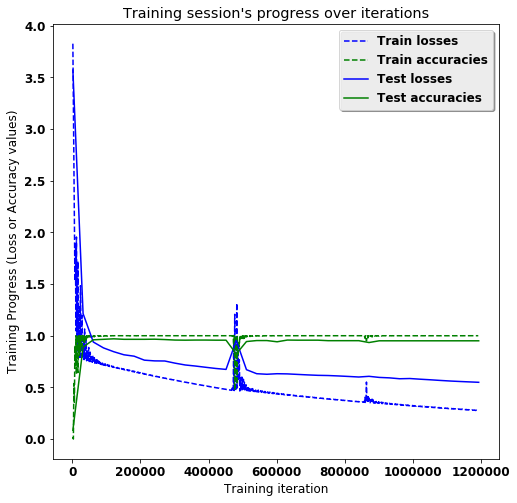

In [23]:
LABELS = [
    "WALKING",  
    "STANDING",
    "SITTING",
    "PLACING",
    "DROPPING",
    "TAKINGOUT",
    "THIEF"    
] 
# (Inline plots: )
%matplotlib inline

font = {
    'weight' : 'bold',
    'size'   : 12
}
matplotlib.rc('font', **font)

width = 8
height = 8
plt.figure(figsize=(width, height))

indep_train_axis = np.array(range(batch_size, (len(train_losses)+1)*batch_size, batch_size))
plt.plot(indep_train_axis, np.array(train_losses),     "b--", label="Train losses")
plt.plot(indep_train_axis, np.array(train_accuracies), "g--", label="Train accuracies")

indep_test_axis = np.append(
    np.array(range(batch_size, len(test_losses)*display_iter, display_iter)[:-1]),
    [training_iters]
)
plt.plot(indep_test_axis, np.array(test_losses),     "b-", label="Test losses")
plt.plot(indep_test_axis, np.array(test_accuracies), "g-", label="Test accuracies")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training iteration')

plt.show()

In [24]:
# #multi class confusion matrix

# # Results

# predictions = one_hot_predictions.argmax(1)

# print("Testing Accuracy: {}%".format(100*accuracy))

# print("")
# print("Precision: {}%".format(100*metrics.precision_score(y_train, predictions, average="weighted")))
# print("Recall: {}%".format(100*metrics.recall_score(y_train, predictions, average="weighted")))
# print("f1_score: {}%".format(100*metrics.f1_score(y_train, predictions, average="weighted")))

# print("")
# print("Confusion Matrix:")
# confusion_matrix = metrics.confusion_matrix(y_train, predictions)
# print(confusion_matrix)
# normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

# print("")
# print("Confusion matrix (normalised to % of total test data):")
# print(normalised_confusion_matrix)
# print("Note: training and testing data is not equally distributed amongst classes, ")
# print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# # Plot Results: 
# width = 5
# height = 5
# plt.figure(figsize=(width, height))
# plt.imshow(
#     normalised_confusion_matrix, 
#     interpolation='nearest', 
#     cmap=plt.cm.rainbow
# )
# plt.title("Confusion matrix \n(normalised to % of total test data)")
# plt.colorbar()
# tick_marks = np.arange(n_classes)
# plt.xticks(tick_marks, LABELS, rotation=90)
# plt.yticks(tick_marks, LABELS)
# plt.tight_layout()
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.show()

Testing Accuracy: 95.08393406867981%

Precision: 95.45943335210937%
Recall: 95.08393285371703%
f1_score: 95.04624814950468%

Confusion Matrix:
[[107   0   0   0  15  10   0]
 [  0 132   0   0   0   0   0]
 [  0   0 132   0   0   0   0]
 [  0   0   0 132   0   0   0]
 [  0   0   0   0  90   0   0]
 [  0   0   0   0   0 104   4]
 [  4   0   0   0   0   8  96]]

Confusion matrix (normalised to % of total test data):
[[ 12.82973576   0.           0.           0.           1.79856122
    1.19904077   0.        ]
 [  0.          15.82733822   0.           0.           0.           0.
    0.        ]
 [  0.           0.          15.82733822   0.           0.           0.
    0.        ]
 [  0.           0.           0.          15.82733822   0.           0.
    0.        ]
 [  0.           0.           0.           0.          10.79136658   0.
    0.        ]
 [  0.           0.           0.           0.           0.          12.47002411
    0.47961631]
 [  0.47961631   0.           0.       

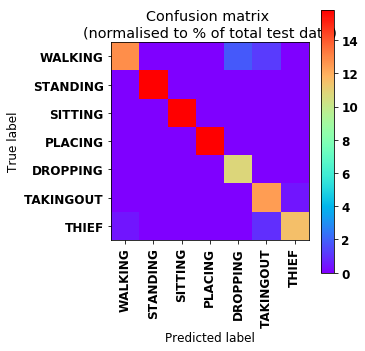

In [25]:
#multi class confusion matrix

# Results

predictions = one_hot_predictions.argmax(1)

print("Testing Accuracy: {}%".format(100*accuracy))

print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test, predictions, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test, predictions, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test, predictions, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results: 
width = 5
height = 5
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix, 
    interpolation='nearest', 
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()